# Pymaceudicals

Erin Bentley | Data Visualization Boot Camp | 12.14.19

Jupyter Notebook: http://127.0.0.1:8888/?token=d7c25dda22116a4a3d1bbdc76cb3df4b3bfd9a5e7f82d505

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
trial_data =  pd.read_csv("data/clinicaltrial_data.csv")

#mouse_drug_data.head()
#trial_data.head()

In [2]:
# Combine the data into a single dataset
drug_trial_data = pd.merge(trial_data, mouse_drug_data, how='left', on="Mouse ID")

# Display the data table for preview
drug_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean_data = drug_trial_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
tumor_mean_data


# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean_data)
tumor_mean_df.head()
# Preview DataFrame

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem_data = drug_trial_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
#tumor_sem_data

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem_data)
# Preview DataFrame
tumor_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
# Drugnames column
# Timepoint is an index for the dataframe

tumor_sem_df = tumor_sem_df.reset_index()
tumor_sem_df

tumor_mean_df = tumor_mean_df.reset_index()
#tumor_mean_df

tumor_sem_df2 = tumor_sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_sem_df2

tumor_mean_df2 = tumor_mean_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_df2

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


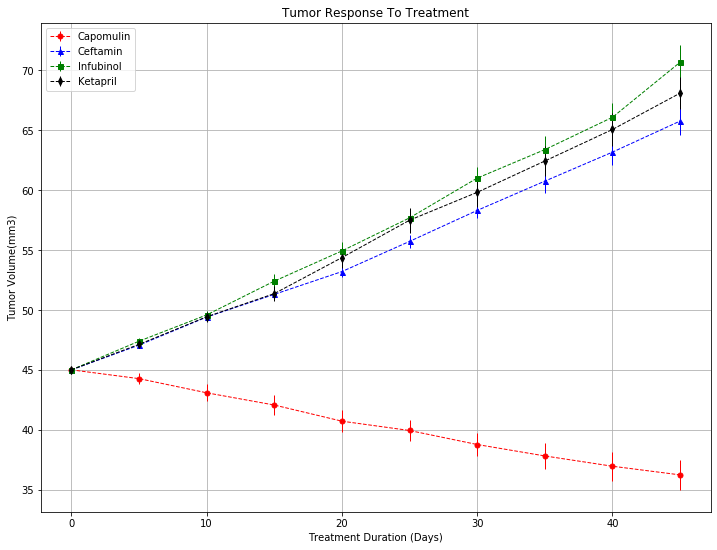

In [24]:
###tumor_mean_df2.index
#tumor_mean_df2["Capomulin"]
# Generate the Plot (with Error Bars)

plt.figure(figsize=(12,9))
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Capomulin"], yerr=tumor_sem_df2["Capomulin"], 
             color="r", linewidth=1, marker="o", markersize=5, linestyle="dashed")

plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Infubinol"], yerr=tumor_sem_df2["Infubinol"], 
             color="b", linewidth=1, marker="^", markersize=5, linestyle="dashed")

plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Ketapril"], yerr=tumor_sem_df2["Ketapril"], 
             color="g", linewidth=1, marker="s", markersize=5, linestyle="dashed")

plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Placebo"], yerr=tumor_sem_df2["Placebo"], 
             color="k", linewidth=1, marker="d", markersize=5, linestyle="dashed")
plt.title("Tumor Response To Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.grid(axis = 'y')
plt.grid(axis = 'x')
plt.legend(labels=tumor_mean_df2.columns)

# Save the Figure
plt.savefig("data/tumor_volume_plot.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_data = drug_trial_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
mean_met_data

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met_data)

# Preview DataFrame
mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem_data = drug_trial_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
#met_sem_data

# Convert to DataFrame
met_sem_df = pd.DataFrame(met_sem_data)

# Preview DataFrame
met_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:

# Minor Data Munging to Re-Format the Data Frames
# Drugnames column
# Timepoint is an index for the dataframe
met_sem_df = met_sem_df.reset_index()
met_sem_df

mean_met_df = mean_met_df.reset_index()
mean_met_df

met_sem_df2 = met_sem_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
met_sem_df2.head()

mean_met_df2 = mean_met_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
mean_met_df2.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


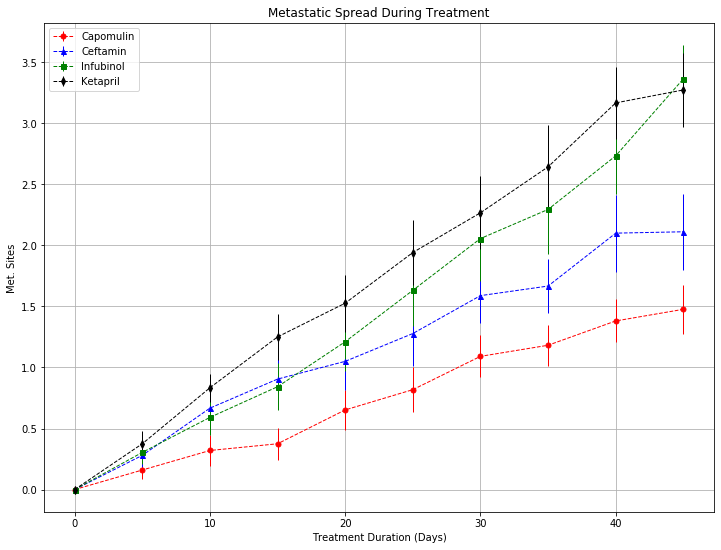

In [20]:
#Generate the Plot (with Error Bars)
plt.figure(figsize=(12,9))
plt.errorbar(mean_met_df2.index, mean_met_df2["Capomulin"], yerr=met_sem_df2["Capomulin"], 
             color="r", linewidth=1, marker="o", markersize=5, linestyle="dashed")

plt.errorbar(mean_met_df2.index, mean_met_df2["Infubinol"], yerr=met_sem_df2["Infubinol"], 
             color="b", linewidth=1, marker="^", markersize=5, linestyle="dashed")

plt.errorbar(mean_met_df2.index, mean_met_df2["Ketapril"], yerr=met_sem_df2["Ketapril"], 
             color="g", linewidth=1, marker="s", markersize=5, linestyle="dashed")

plt.errorbar(mean_met_df2.index, mean_met_df2["Placebo"], yerr=met_sem_df2["Placebo"], 
             color="k", linewidth=1, marker="d", markersize=5, linestyle="dashed")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(axis = 'y')
plt.grid(axis = 'x')
plt.legend(labels=mean_met_df2.columns)
# Save the Figure
plt.savefig("data/metastatic_plot.png")
# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_data = drug_trial_data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
#mice_data
# Convert to DataFrame
mice_df = pd.DataFrame(mice_data)
mice_df.head()
# Preview DataFrame

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
# Drugnames column
# Timepoint is an index for the dataframe
mice_df = mice_df.reset_index()
#mice_df
mice_df2 = mice_df.pivot(index="Timepoint", columns="Drug")["Mouse ID"]
# Preview that Reformatting worked
mice_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


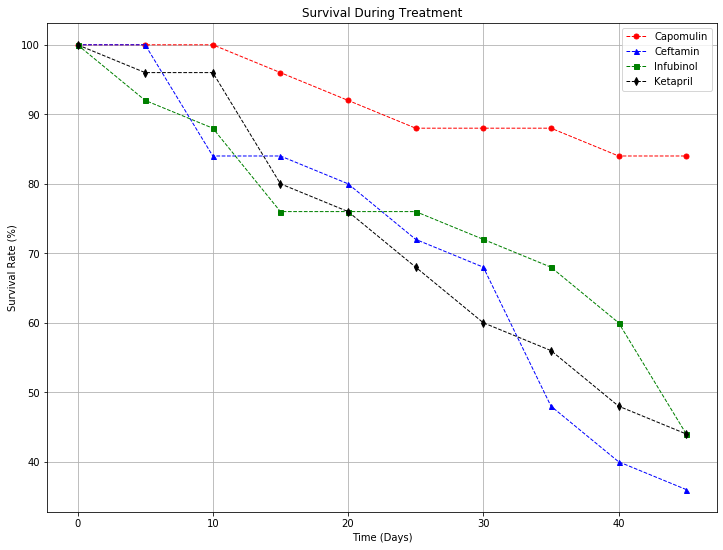

In [19]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(12,9))
survival_rate = mice_df2/(mice_df2.iloc[0]).round(0)*100

plt.plot(survival_rate.index, survival_rate["Capomulin"], 
             color="r", linewidth=1, marker="o", markersize=5, linestyle="dashed")

plt.plot(survival_rate.index, survival_rate["Infubinol"], 
             color="b", linewidth=1, marker="^", markersize=5, linestyle="dashed")

plt.plot(survival_rate.index, survival_rate["Ketapril"], 
             color="g", linewidth=1, marker="s", markersize=5, linestyle="dashed")

plt.plot(survival_rate.index, survival_rate["Placebo"], 
             color="k", linewidth=1, marker="d", markersize=5, linestyle="dashed")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(axis = 'y')
plt.grid(axis = 'x')
#plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"])
plt.legend(labels=mice_df2.columns)
# Save the Figure
plt.savefig("data/mice_plot.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [30]:
# Calculate the percent changes for each drug
change = 100 * (tumor_mean_df2.iloc[-1] - tumor_mean_df2.iloc[0])/tumor_mean_df2.iloc[0]
change
# Display the data to confirm

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

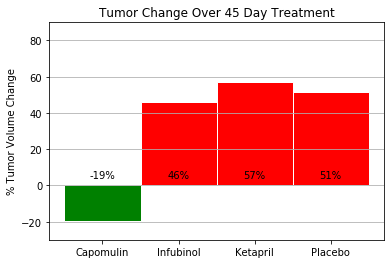

<Figure size 864x648 with 0 Axes>

In [63]:
# Store all Relevant Percent Changes into a Tuple
pct_change = (change["Capomulin"], change["Infubinol"],
               change["Ketapril"], change["Placebo"])
#pct_change
# Splice the data between passing and failing drugs
fig,ax = plt.subplots()
ind = np.arange(len(pct_change))
width = 1

Pass = ax.bar(ind[0], pct_change[0], width, color = "green", edgecolor = 'white')
Fail = ax.bar(ind[1:], pct_change[1:], width, color = "red", edgecolor = 'white')

# Orient widths. Add labels, tick marks, etc. 

plt.figure(figsize=(12,9))
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.horizontalalignment = 'right'
ax.set_ylim([-30, 90])
ax.grid(axis = 'y')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 3, "%d%%" % int(height),
                ha = "center", va = "bottom", color = "black")
# Call functions to implement the function calls
autolabel(rectsPass)
autolabel(rectsFail)

# Save the Figure
plt.savefig("data/summary_plot.png")

# Show the Figure
fig.show()